In [1]:
import matplotlib.pyplot as plt
import wisc_ecephys_tools as wet
import xarray as xr
from ecephys import utils, wne, xrsig

from findlay2025a import core
from findlay2025a.constants import Experiments as Exps
from findlay2025a.constants import Files

In [ ]:
# Select the subject and experiment you want to perform localization for.
wne_subject = wet.get_sglx_subject("CNPIX17-Hans")
experiment = Exps.COW

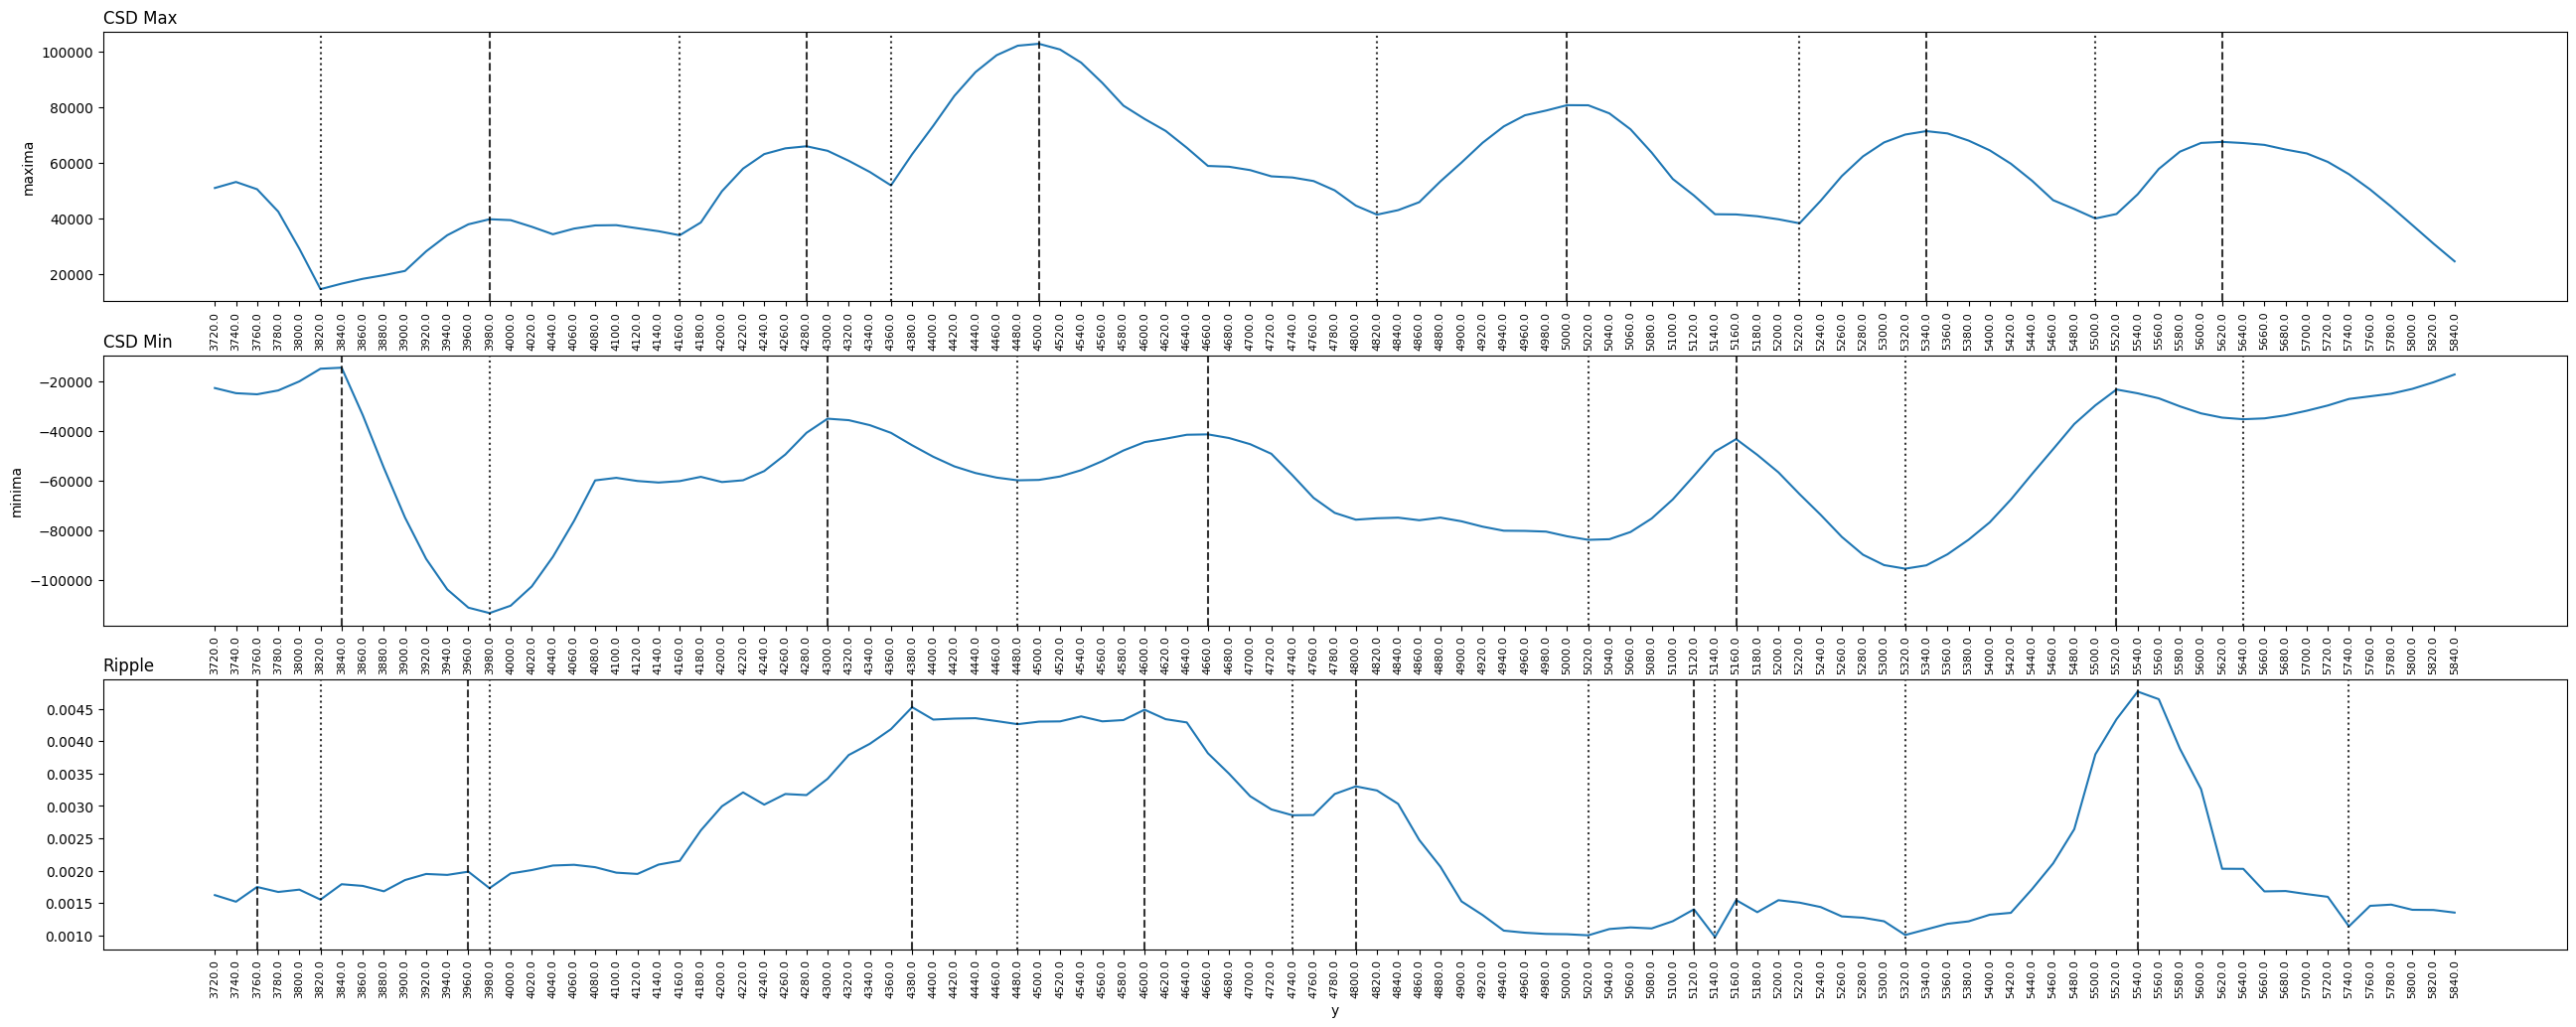

In [5]:
# Visualize current source density and ripple power profiles.
# Peaks and troughs of each are plotted, for reference.
nb = core.get_project("seahorse")
ripple_profile_file = nb.get_experiment_subject_file(
    experiment, wne_subject.name, Files.ESTM_PERIOD_RIPPLE_PROFILE
)
ripple_profile = xr.load_dataarray(ripple_profile_file)
kcsd_profile_file = nb.get_experiment_subject_file(
    experiment, wne_subject.name, Files.ESTM_PERIOD_KCSD_PROFILE
)
kcsd_profile = xr.load_dataset(kcsd_profile_file)

fig, axes = plt.subplots(3, 1, figsize=(32, 12))
for ax, dat, title in zip(
    axes,
    [kcsd_profile["maxima"], kcsd_profile["minima"], ripple_profile],
    ["CSD Max", "CSD Min", "Ripple"],
):
    peaks, troughs = core.get_peaks_and_troughs(dat)
    xrsig.plot_laminar_scalars_horizontal(dat, ax=ax, show_channel_ids=False)
    for pk in peaks:
        ax.axvline(pk, linestyle="--", color="k", alpha=0.8)
    for tr in troughs:
        ax.axvline(tr, linestyle=":", color="k", alpha=0.8)
    ax.set_title(title, loc="left")

In [65]:
OVERWRITE_EXISTING = False

# Using the profiles above, plus histology or any other notes, visual inspection of LFPs, etc.,
# input various landmarks and subregion boundary estimates.
hippocampal_subregions = {
    "ripple_power_peak": 5080,
    "stratum_oriens_upper": 5380,
    "stratum_oriens_peak": 5120,
    "stratum_oriens_lower": 4980,
    "stratum_radiatum_upper": 4960,
    "stratum_radiatum_peak": 4820,
    "stratum_radiatum_lower": 4680,
    "stratum_lacunosum_moleculare_upper": 4640,
    "stratum_lacunosum_moleculare_peak": 4520,
    "stratum_lacunosum_moleculare_lower": 4400,
}

s3 = core.get_project("shared")
savefile = s3.get_experiment_subject_file(
    experiment, wne_subject.name, wne.Files.HIPPOCAMPAL_SUBREGIONS
)
if not OVERWRITE_EXISTING and savefile.exists():
    raise FileExistsError
else:
    utils.write_json(hippocampal_subregions, savefile)